# Classifying fake news using supervised learning with NLP

<img src = "himawari.jpg" width = 500>

<h2>Building word count vectors with scikit-learn</h2>

In [1]:
#import library
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('fake_or_real_news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
#crate a sesiers store to y
y = df.label
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [4]:
#make a train and test data with split
X_train,X_test,y_train,y_test = train_test_split(df['text'], y , test_size=0.33 , random_state= 53)


In [5]:
#memasukan ibrarry countvectorize 
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer

CountVectorizer(stop_words='english')

In [6]:
#count value x train and x test
count_train = count_vectorizer.fit_transform(X_train)
count_train

<4244x56922 sparse matrix of type '<class 'numpy.int64'>'
	with 1119820 stored elements in Compressed Sparse Row format>

In [7]:
count_test = count_vectorizer.transform(X_test)
count_test

<2091x56922 sparse matrix of type '<class 'numpy.int64'>'
	with 533697 stored elements in Compressed Sparse Row format>

In [8]:
#show the feature name of count_vectorize
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


In [9]:
print(count_train.A[:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<h2>TfidfVectorizer for text classification</h2>

In [10]:
#import library
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
#insisiate model
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_vectorizer

TfidfVectorizer(max_df=0.7, stop_words='english')

In [12]:
#count result of tran and test
tfid_train = tfidf_vectorizer.fit_transform(X_train)
tfid_train

<4244x56922 sparse matrix of type '<class 'numpy.float64'>'
	with 1119820 stored elements in Compressed Sparse Row format>

In [13]:
tfid_test = tfidf_vectorizer.transform(X_test)
tfid_test

<2091x56922 sparse matrix of type '<class 'numpy.float64'>'
	with 533697 stored elements in Compressed Sparse Row format>

In [14]:
#show data from tfid_vectorize and tfid_train
print('tfid_vectorizer result:\n' , tfidf_vectorizer.get_feature_names()[:10])
print('')
print('X_train result:\n', tfid_train.A[:5])

tfid_vectorizer result:
 ['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']

X_train result:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<h2>Inspecting the vectors</h2>

In [15]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A , columns = count_vectorizer.get_feature_names())
count_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Create the TfidfVectorizer DataFrame: tfidf_df
tfid_df = pd.DataFrame(tfid_train.A , columns= tfidf_vectorizer.get_feature_names())
tfid_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Calculate the difference in columns: difference
difference = set(tfid_df.columns) - set(count_df.columns)
print(difference)

set()


In [18]:
# Check whether the DataFrames are equal
print(count_df.equals(tfid_df))

False


<h1>Training and testing a classification model with scikit-learn with Naive Bayes</h1>

<h2>CountVectorizer</h2>

In [43]:
#import need library
from sklearn. metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [20]:
#call meodel
nb_classifier = MultinomialNB()

In [21]:
#fit model to train data
nb_classifier.fit(count_train, y_train)

MultinomialNB()

In [22]:
#predict result from test variable
pred = nb_classifier.predict(count_test)
pred

array(['REAL', 'REAL', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype='<U4')

In [24]:
#accuracy
score = accuracy_score(pred, y_test)
score

0.893352462936394

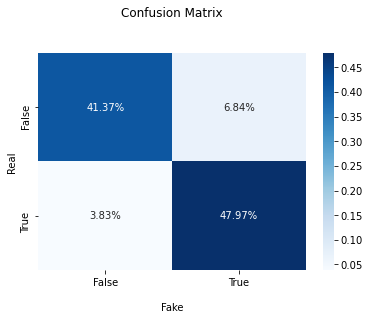

In [29]:
#count confusion matrix
cf_matrix = confusion_matrix(y_test,pred)

#plot confusion matrix
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nFake')
ax.set_ylabel('Real');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [31]:
#classification report
cr_count = classification_report(y_test,pred)
print(cr_count)

              precision    recall  f1-score   support

        FAKE       0.92      0.86      0.89      1008
        REAL       0.88      0.93      0.90      1083

    accuracy                           0.89      2091
   macro avg       0.90      0.89      0.89      2091
weighted avg       0.89      0.89      0.89      2091



<h2>TfidfVectorizer</h2>

In [33]:
#fit model to train data
nb_classifier.fit(tfid_train, y_train)

MultinomialNB()

In [34]:
#predict result from test variable
pred_tfid = nb_classifier.predict(tfid_test)
pred_tfid

array(['REAL', 'REAL', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype='<U4')

In [36]:
#accuracy
score_tfid = accuracy_score(pred_tfid, y_test)
score_tfid

0.8565279770444764

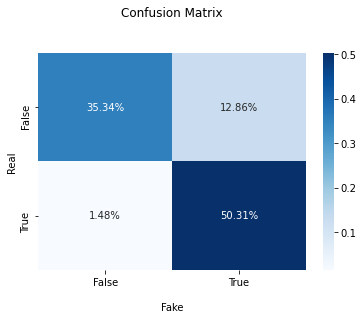

In [37]:
#count confusion matrix
cf_matrix_tf = confusion_matrix(y_test,pred_tfid)

#plot confusion matrix
ax = sns.heatmap(cf_matrix_tf/np.sum(cf_matrix_tf), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nFake')
ax.set_ylabel('Real');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [38]:
#classification report
cr_count_tf = classification_report(y_test,pred_tfid)
print(cr_count_tf)

              precision    recall  f1-score   support

        FAKE       0.96      0.73      0.83      1008
        REAL       0.80      0.97      0.88      1083

    accuracy                           0.86      2091
   macro avg       0.88      0.85      0.85      2091
weighted avg       0.88      0.86      0.85      2091



<h3>Improve model</h3>

In [44]:
# Create the list of alphas: alphas
alphas = np.arange(0, 1, .1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfid_train, y_train)
    # Predict the labels: pred
    pred_id = nb_classifier.predict(tfid_test)
    # Compute accuracy: score
    score_id = accuracy_score(y_test, pred_id)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()


Alpha:  0.0
Score:  0.893352462936394

Alpha:  0.1
Score:  0.893352462936394

Alpha:  0.2
Score:  0.893352462936394

Alpha:  0.30000000000000004
Score:  0.893352462936394

Alpha:  0.4
Score:  0.893352462936394

Alpha:  0.5
Score:  0.893352462936394

Alpha:  0.6000000000000001
Score:  0.893352462936394

Alpha:  0.7000000000000001
Score:  0.893352462936394

Alpha:  0.8
Score:  0.893352462936394

Alpha:  0.9
Score:  0.893352462936394



In [45]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])


FAKE [(-11.316312804238807, '0000'), (-11.316312804238807, '000035'), (-11.316312804238807, '0001'), (-11.316312804238807, '0001pt'), (-11.316312804238807, '000km'), (-11.316312804238807, '0011'), (-11.316312804238807, '006s'), (-11.316312804238807, '007'), (-11.316312804238807, '007s'), (-11.316312804238807, '008s'), (-11.316312804238807, '0099'), (-11.316312804238807, '00am'), (-11.316312804238807, '00p'), (-11.316312804238807, '00pm'), (-11.316312804238807, '014'), (-11.316312804238807, '015'), (-11.316312804238807, '018'), (-11.316312804238807, '01am'), (-11.316312804238807, '020'), (-11.316312804238807, '023')]
REAL [(-7.742481952533027, 'states'), (-7.717550034444668, 'rubio'), (-7.703583809227384, 'voters'), (-7.654774992495461, 'house'), (-7.649398936153309, 'republicans'), (-7.6246184189367, 'bush'), (-7.616556675728881, 'percent'), (-7.545789237823644, 'people'), (-7.516447881078008, 'new'), (-7.448027933291952, 'party'), (-7.411148410203476, 'cruz'), (-7.410910239085596, 'st